In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c

In [21]:
def gaussian(x,inten,m,sigma):
    return  - inten*np.exp(-((x-m)/sigma)**2)
xx0 = np.linspace(4000, 5000, num=4000)
faux_spec = np.zeros(4000)

#faux1=gaussian(xx0,20./rand,0.003*abs(rand),3500+rand,0.2)
def spec():
    faux_spec = np.zeros(4000)
    
    for i in range(20):
        rand = np.random.randint(-500,500)

        faux_spec+=gaussian(xx0,20./rand,4500+rand,0.02*abs(rand))
    
    faux_spec = np.abs(faux_spec)
    faux_spec = np.ones(4000) - faux_spec + np.random.normal(0.00,0.005,4000)
    return faux_spec

a=spec()
b=spec()

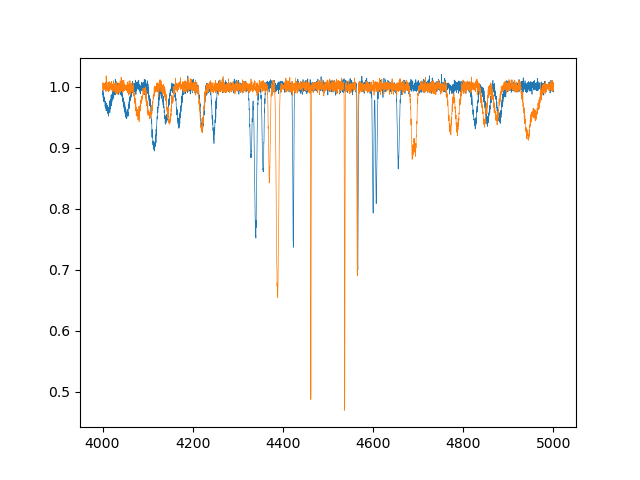

In [22]:
%matplotlib widget
plt.plot(xx0,b,xx0,a,linewidth=0.5)
#fake spectrum == print(money)
#plt.xlim(3600,3700)

In [ ]:
#a lets move

In [32]:
disp = lambda x,x0 : c.c.to('km/s') * (x/x0 - 1) 
ls = c.c.to('km/s')
def rest(x,v):
    return  x / ((v/ls.value) + 1)

In [33]:
a_move = rest(xx0,75)
b_move = rest(xx0,-80)

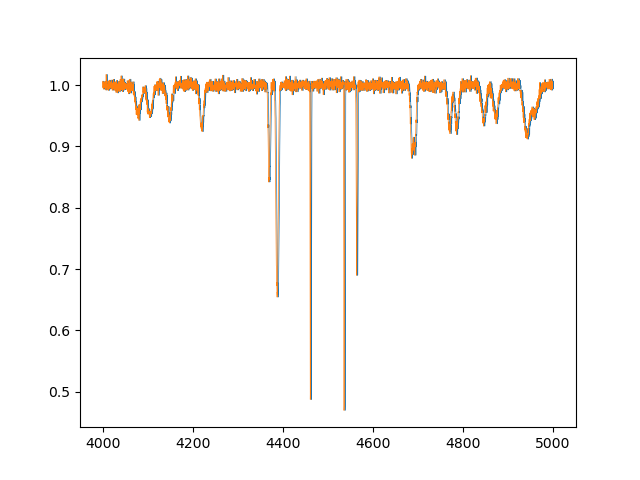

In [34]:
%matplotlib widget
plt.plot(b_move,a,a_move,a,linewidth=0.5)

# Con `numpy.correlate`

In [ ]:
np.array(fauma0)

In [ ]:
xx0 = np.linspace(4128, 4132, num=2000)
faux1=gaussian(xx0,cont=1,inten=0.1,m=4130,sigma=0.07)+np.random.normal(0.00,0.008,2000)
masked0=np.ma.masked_outside(xx0,4129.5,4131)
masked0 += np.ones_like(masked0)*0.5
mask0 = np.ma.getmask(masked0)
fauma0=np.array(np.ma.array(faux0,mask=mask0))

plt.plot(xx0,faux0)
plt.plot(masked0,fauma0,linewidth=0.8)

In [ ]:
cor=np.correlate(faux1,fauma0,'same')

In [ ]:
len(cor)

In [ ]:
plt.plot(xx0,cor)

Función de correlacion! Ahora tengo que transformar esto en una VR

In [ ]:
#esto da el indice del array (mas largo) donde se da el máximo de correlación
#por la correspondencia xx0-faux(en este caso el vector más largo), xx0[indice] es valor en lambda donde se da el maximo de correlación 
xmax = xx0[np.argmax(cor)]
xmax 

esto me da el max en el array original, si suponemos que el template ya esta centrado, la diferencia en lambda sale y por lo tanto la vr

4130.5 es la rest en este caso, porque moví el template

In [ ]:
lambda0 = 4130.5
#c en m/s


In [ ]:
disp = lambda x,x0 : c.c.to('km/s') * (x/x0 - 1) 
ls = c.c.to('km/s')
def correlate_velocity_line(spectrum_lambda,spectrum_flux,template,lambda0):
    """Returns velocity in km/s of observed line, based on template and rest lambda `lambda0`"""
    cor=np.correlate(spectrum_flux,template,'same')
    xmax = spectrum_lambda[np.argmax(cor)]
    return disp(xmax,lambda0)

In [ ]:
correlate_velocity_line(xx0,faux0,fauma0,lambda0)

In [ ]:
 (np.ones_like(xx0) * ((-36.3/ls.value) + 1))

In [ ]:
plt.plot(rest(xx0,-36.2174),faux0,xx0,faux0,masked0,fauma0+0.001)
plt.xlim(4130,4131)

# Many regions?

In [ ]:
Cómo va a ser la correlacion cuando haya muchas rgiones? Funcionará 'same'?

In [ ]:
spec = [1 if i%30 == 0 else i/40 for i in range(200)]

In [ ]:
spec += np.random.normal(0.00,0.08,200)
spec2 = spec + np.random.normal(0.00,0.15,200)

In [ ]:
plt.plot(range(200), spec,range(200), spec2)

In [ ]:
mask=[True if i%30 == 0 else False for i in range(200)]
mask2=[False if i%30 == 0 else True for i in range(200)]


In [ ]:
refreg=np.ma.array(spec,mask=mask)
plt.plot(range(200),refreg)

In [ ]:
spec2[mask2]

In [ ]:
correlation=np.correlate(ref2:=np.ma.array(spec2,mask=mask2),refreg,'same')
correlation2=np.correlate(spec2,spec,'same')
plt.plot(range(200),correlation)#,range(200),correlation2)

como las mascaras son opuestas, no hay correlacion que hacer

In [ ]:
correlation2=np.correlate(spec,spec,'full')
plt.plot(range(39),correlation2)

No estoy seguro de cómo lograr que tranabajr lineas por separado. por ahora rref y oreg son mascaras, la correlacion va a ser válida 